
$$
F_{(x)} = ax_1^2 + bx_1x_2 + cx_2^2 + dx_1 + ex_2
$$

$$
\Rightarrow F_{(x)} = 2x_1^2 + 9x_1x_2 + 6x_2^2 + 8x_1 + 3x_2
$$

$$
\nabla F_{(x)}=\begin{bmatrix} 
	\dfrac{\partial } {\partial x_1}  F_{(x)} \\
	\\
	\dfrac{\partial } {\partial x_2}  F_{(x)} \\
	\end{bmatrix}

	=\begin{bmatrix} 
	4x_1 + 9x_2 + 8 \\
	\\
	12x_2 + 9x_1 + 3 \\
	\end{bmatrix}

$$

$$
A = \nabla^2 F_{(x)}=\begin{bmatrix} 
	\dfrac{\partial } {\partial x_1^2} F_{(x)} & \dfrac{\partial } {\partial x_1x_2} F_{(x)}\\ 
	\\
	\dfrac{\partial } {\partial x_2x_1} F_{(x)} & \dfrac{\partial } {\partial x_2^2} F_{(x)}\\
	\end{bmatrix}

	=\begin{bmatrix} 
	4 & 9\\ 
	\\
	9 & 12\\
	\end{bmatrix}
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [12]:
A = np.array([[4,9],[9,12]])
print(A)


[[ 4  9]
 [ 9 12]]


In [109]:
w , v = np.linalg.eig(A)
print("w:",w)
print("v:",v)

w: [-1.8488578 17.8488578]
v: [[-0.83849224 -0.54491354]
 [ 0.54491354 -0.83849224]]


$$
\lambda_1\lambda_2 < 0
$$

$$
\Rightarrow  
$$
                                                                   Saddle point

In [14]:
def f(x1, x2):
    return 2*x1**2 + 9*x1*x2 + 6*x2**2 + 8*x1 + 3*x2

In [15]:
X1 = np.linspace(-1000, 1000, 40)
X2 = np.linspace(-1000, 1000, 40)

X1, X2 = np.meshgrid(X1, X2)
Z = f(X1, X2)

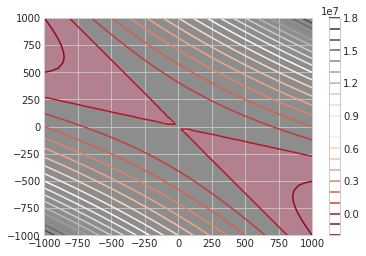

In [16]:
plt.contour(X1, X2, Z, 20, cmap='RdGy')
plt.colorbar()
plt.imshow(Z, extent=[-1000, 1000, -1000, 1000], cmap='RdGy', alpha=0.5, interpolation='bilinear', origin='lower', aspect='auto', vmin=0, vmax=1000)
plt.cm.get_cmap('RdGy', 1000)
plt.show()

/tmp/ipykernel_2822/2793128734.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


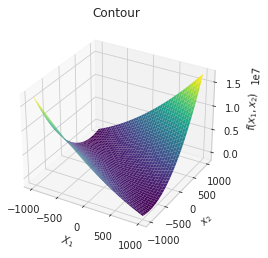

In [17]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1, X2, Z, rstride=1, cstride=1, linewidth=0.1, antialiased=True, cmap='viridis', edgecolor='none')
ax.set_xlabel('$X_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1, x_2)$')
ax.set_title('Contour');
plt.show()


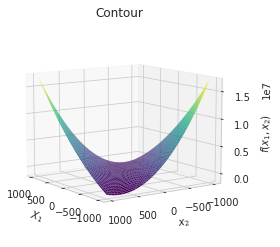

In [31]:
ax.view_init(10, 145)
fig

## Steepest Descent Method

$$
{x_{k+1}} = x_k - \alpha \nabla F_{(x_k)}
$$

$$
x_0 = \begin{bmatrix} 
    -0.1 e \\
    +0.1 e \\
    \end{bmatrix}
$$

$$
\Rightarrow x_0 = \begin{bmatrix} 
    -0.3 \\
    +0.3 \\
    \end{bmatrix}
$$

#### Minimize Along the Line
$$
\alpha_k = \frac{\nabla F_{(x_k)}^T \nabla F_{(x_k)}}{\nabla F_{(x_k)}^T A \nabla F_{(x_k)}}
$$

In [7]:
def g(x1, x2):
    grad = np.zeros(2)
    grad[0] = 4*x1 + 9*x2 + 8
    grad[1] = 9*x1 + 12*x2 + 3
    return grad

In [8]:
def hess(x1, x2):
    hess = np.zeros((2,2))
    hess[0,0] = 4
    hess[0,1] = 9
    hess[1,0] = 9
    hess[1,1] = 12
    return hess

In [9]:
def alpha(x1,x2):
    """
    Minimize Along the Line
    """
    g_Transpose = np.transpose(g(x1,x2))
    return np.dot(g(x1,x2),g(x1,x2))/(np.dot(g_Transpose,np.dot(hess(x1,x2),g(x1,x2))))

In [11]:
def My_steepest_descent(x0, eps, max_iter):
    """
    x0: Initial point
    eps: Accuracy
    max_iter: Maximum number of iterations
    x_history: List of points visited
    """
    x_history = [x0]
    x = x0
    for i in range(max_iter):
        grad = g(x[0], x[1])
        alpha_ = alpha(x[0], x[1])
        x = x - alpha_*grad
        x_history.append(x)
        if np.linalg.norm(grad) < eps:
            break
    return x_history

In [18]:
class Steepest_Descent_Optimizer:
    def __init__(self, x0, eps, max_iter):
        """
        find the minimum of the function f(x) = 2*x1**2 + 9*x1*x2 + 6*x2**2 + 8*x1 + 3*x2
        along the line x1 = x0[0] + alpha*grad[0] and x2 = x0[1] + alpha*grad[1]
        x0: Initial point
        eps: Accuracy
        max_iter: Maximum number of iterations
        x_history: List of points visited
        """
        self.x0 = x0
        self.eps = eps
        self.max_iter = max_iter
        self.x_history = np.array([x0])
        self.alpha_history = np.array([])

    def f(self, x1, x2):
        """
        f(x) = 2*x1**2 + 9*x1*x2 + 6*x2**2 + 8*x1 + 3*x2
        """
        return 2*x1**2 + 9*x1*x2 + 6*x2**2 + 8*x1 + 3*x2

    def g(self, x):
        """
        Gradient
        input: x
        output: grad
        """
        grad = np.zeros(2)
        grad[0] = 4*x[0] + 9*x[1] + 8
        grad[1] = 9*x[0] + 12*x[1] + 3
        return grad

    def hess(self, x):
        """
        Hessian Matrix

        input: x
        output: hess
        """
        hess = np.zeros((2,2))
        hess[0,0] = 4
        hess[0,1] = 9
        hess[1,0] = 9
        hess[1,1] = 12
        return hess

    def alpha(self, x):
        """
        Minimize Along the Line

        input: x
        output: alpha
        """
        g_Transpose = np.transpose(self.g(x))
        return np.dot(self.g(x),self.g(x))/(np.dot(g_Transpose,np.dot(self.hess(x),self.g(x))))

    def Algorithm(self):
        """
        inpu: None
        output: x_history
        """
        x = self.x0
        for i in range(self.max_iter):
            grad = self.g(x)
            alpha_ = self.alpha(x)
            # alpha history during the iterations
            self.alpha_history = np.append(self.alpha_history, alpha_)
            x = x - alpha_*grad
            self.x_history = np.vstack((self.x_history, x))
            if np.linalg.norm(grad) < self.eps:
                break
        return self.x_history

    def Plot_contour(self, n = 40):
        """
        Plot the contour of the function f(x) = 2*x1**2 + 9*x1*x2 + 6*x2**2 + 8*x1 + 3*x2
        """
        X1 = np.linspace(-1000, 1000, n)
        X2 = np.linspace(-1000, 1000, n)
        X1, X2 = np.meshgrid(X1, X2)
        Z = self.f(X1, X2)
        plt.contour(X1, X2, Z, 20, cmap='RdGy')
        plt.colorbar()
        plt.imshow(Z, extent=[-1000, 1000, -1000, 1000], cmap='RdGy', alpha=0.5, interpolation='bilinear', origin='lower', aspect='auto', vmin=0, vmax=1000)
        plt.cm.get_cmap('RdGy', 1000)

    def Plot_contour_and_path(self, size = 5):
        """
        Plot the contour of the function f(x) = 2*x1**2 + 9*x1*x2 + 6*x2**2 + 8*x1 + 3*x2
        and the path of the algorithm
        """
        x_history = self.Algorithm()
        X1 = np.linspace(-size, size, 40)
        X2 = np.linspace(-size, size, 40)
        X1, X2 = np.meshgrid(X1, X2)
        Z = self.f(X1, X2)
        plt.plot(x_history[:,0], x_history[:,1], 'x-', color = 'blue', linewidth = 1, label = 'Path')
        plt.contour(X1, X2, Z, 20, cmap='RdGy')
        plt.colorbar()
        plt.imshow(Z, extent=[-size, size, -size, size], cmap='RdGy', alpha=0.5, interpolation='bilinear', origin='lower', aspect='auto', vmin=0, vmax=1000)
        plt.title(f'Steepest Descent Optimization with eps = {self.eps} and max_iter = {self.max_iter}')
        plt.show()


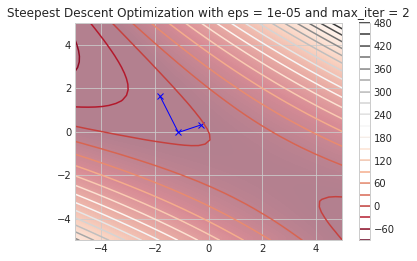

In [48]:
x0 = np.array([-0.3, 0.3])
S = Steepest_Descent_Optimizer(x0=x0, eps=1e-5, max_iter=2)
S.Plot_contour_and_path(size=5)

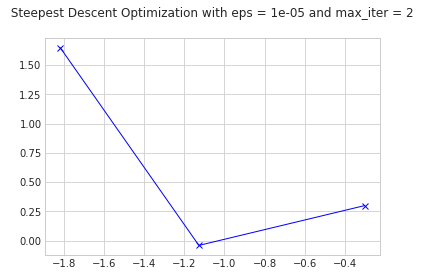

In [49]:
plt.plot(S.x_history[:,0], S.x_history[:,1], 'x-', color = 'blue', linewidth = 1, label = 'Path')
plt.title(f' Steepest Descent Optimization with eps = {S.eps} and max_iter = {S.max_iter} \n')
plt.show()

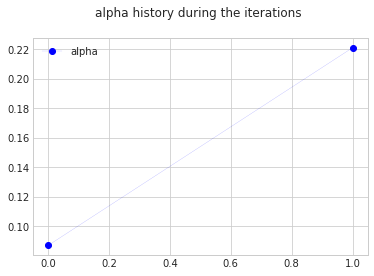

In [77]:
# plot alpha history during the iterations 
plt.plot(S.alpha_history, 'o-', color = 'blue', linewidth = 0.1, label = 'alpha')
plt.title(f'alpha history during the iterations \n')
plt.legend()
plt.show()

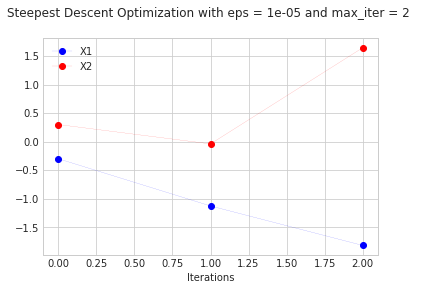

In [67]:
# plot X1 and X2 history during the iterations
plt.plot(S.x_history[:,0], 'o-', color = 'blue', linewidth = 0.1, label = 'X1')
plt.xlabel('Iterations')
plt.plot(S.x_history[:,1], 'o-', color = 'red', linewidth = 0.1, label = 'X2')
plt.legend()
plt.title(f'Steepest Descent Optimization with eps = {S.eps} and max_iter = {S.max_iter} \n')
plt.show()

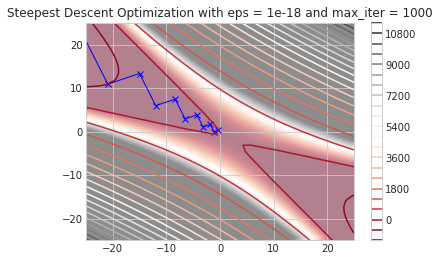

In [78]:
x0 = np.array([-0.3, 0.3])
S = Steepest_Descent_Optimizer(x0=x0, eps=1e-18, max_iter=1000)
S.Plot_contour_and_path(size=25)

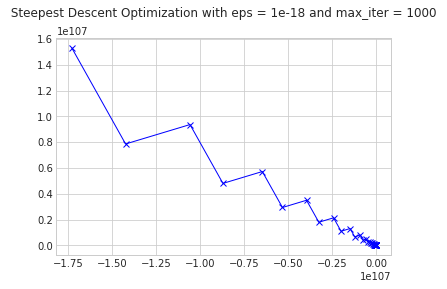

In [79]:
# Plot x_history
plt.plot(S.x_history[:,0], S.x_history[:,1], 'x-', color = 'blue', linewidth = 1, label = 'Path')
plt.title(f' Steepest Descent Optimization with eps = {S.eps} and max_iter = {S.max_iter} \n')
plt.show()

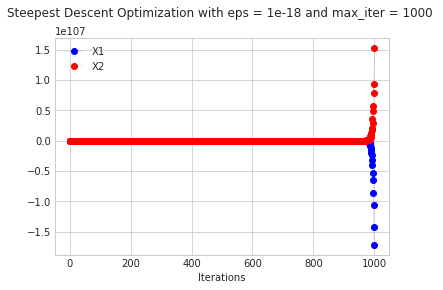

In [100]:
# plot X1 and X2 history during the iterations
plt.plot(S.x_history[:,0], 'o-', color = 'blue', linewidth = 0.1, label = 'X1')
plt.xlabel('Iterations')
plt.plot(S.x_history[:,1], 'o-', color = 'red', linewidth = 0.1, label = 'X2')
plt.legend()
plt.title(f'Steepest Descent Optimization with eps = {S.eps} and max_iter = {S.max_iter} \n')
plt.show()

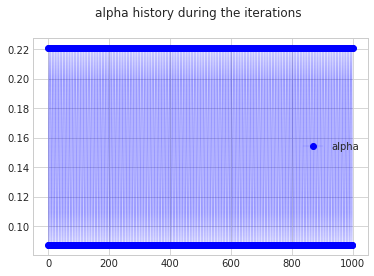

In [94]:
x = S.alpha_history.reshape(S.alpha_history.shape[0],1)
plt.plot(x, 'o-', color = 'blue', linewidth = 0.1, label = 'alpha')
plt.title(f'alpha history during the iterations \n')
plt.legend()
plt.show()

## Newton's Method

$$
x_{k+1} = x_k - A_k^{-1} \nabla F_{(x_k)}
$$

$$
A_k = \nabla^2 F_{(x_k)} = \begin{bmatrix} 
    \dfrac{\partial } {\partial x_1^2} F_{(x_k)} & \dfrac{\partial } {\partial x_1x_2} F_{(x_k)}\\ 
    \\
    \dfrac{\partial } {\partial x_2x_1} F_{(x_k)} & \dfrac{\partial } {\partial x_2^2} F_{(x_k)}\\
    \end{bmatrix}
    =\begin{bmatrix}
    4 & 9\\
    \\
    9 & 12\\
    \end{bmatrix}
$$


$$
x_0 = \begin{bmatrix} 
    -0.1 e \\
    +0.1 e \\
    \end{bmatrix}
$$

$$
\Rightarrow x_0 = \begin{bmatrix} 
    -0.3 \\
    +0.3 \\
    \end{bmatrix}
$$



In [3]:
class Newton_Optimizer:
    def __init__(self, x0, eps, max_iter):
        """
        find the minimum of the function f(x) = 2*x1**2 + 9*x1*x2 + 6*x2**2 + 8*x1 + 3*x2
        along the line x1 = x0[0] + alpha*grad[0] and x2 = x0[1] + alpha*grad[1]
        
        x0: Initial point
        eps: Accuracy
        max_iter: Maximum number of iterations
        x_history: List of points visited
        """
        self.x0 = x0
        self.eps = eps
        self.max_iter = max_iter
        self.x_history = np.array([x0])

    def f(self, x1, x2):
        """
        f(x) = 2*x1**2 + 9*x1*x2 + 6*x2**2 + 8*x1 + 3*x2
        """
        return 2*x1**2 + 9*x1*x2 + 6*x2**2 + 8*x1 + 3*x2

    def g(self, x):
        """
        Gradient
        input: x
        output: grad
        """
        grad = np.zeros(2)
        grad[0] = 4*x[0] + 9*x[1] + 8
        grad[1] = 9*x[0] + 12*x[1] + 3
        return grad

    def hess(self, x):
        """
        Hessian Matrix

        input: x
        output: hess
        """
        hess = np.zeros((2,2))
        hess[0,0] = 4
        hess[0,1] = 9
        hess[1,0] = 9
        hess[1,1] = 12
        return hess

    def Algorithm(self):
        """
        inpu: None
        output: x_history
        """
        x = self.x0
        for i in range(self.max_iter):
            grad = self.g(x)
            hess = self.hess(x)
            x = x - np.dot(np.linalg.inv(hess),grad)
            self.x_history = np.vstack((self.x_history, x))
            if np.linalg.norm(grad) < self.eps:
                break
        return self.x_history

    def Plot_contour(self, n = 40):
        """
        Plot the contour of the function f(x) = 2*x1**2 + 9*x1*x2 + 6*x2**2 + 8*x1 + 3*x2
        """
        X1 = np.linspace(-1000, 1000, n)
        X2 = np.linspace(-1000, 1000, n)
        X1, X2 = np.meshgrid(X1, X2)
        Z = self.f(X1, X2)
        plt.contour(X1, X2, Z, 20, cmap='RdGy')
        plt.colorbar()
        plt.imshow(Z, extent=[-1000, 1000, -1000, 1000], cmap='RdGy', alpha=0.5, interpolation='bilinear', origin='lower', aspect='auto', vmin=0, vmax=1000)
        plt.cm.get_cmap('RdGy', 1000)

    def Plot_contour_and_path(self, size = 5):
        """
        Plot the contour of the function f(x) = 2*x1**2 + 9*x1*x2 + 6*x2**2 + 8*x1 + 3*x2
        and the path of the algorithm
        """
        x_history = self.Algorithm()
        X1 = np.linspace(-size, size, 40)
        X2 = np.linspace(-size, size, 40)
        X1, X2 = np.meshgrid(X1, X2)
        Z = self.f(X1, X2)
        plt.plot(x_history[:,0], x_history[:,1], 'x-', color = 'blue', linewidth = 1, label = 'Path')
        plt.contour(X1, X2, Z, 20, cmap='RdGy')
        plt.colorbar()
        plt.imshow(Z, extent=[-size, size, -size, size], cmap='RdGy', alpha=0.5, interpolation='bilinear', origin='lower', aspect='auto', vmin=0, vmax=1000)
        plt.title(f'Newton\'s Optimization Method with eps = {self.eps} and max_iter = {self.max_iter}')
        plt.show()

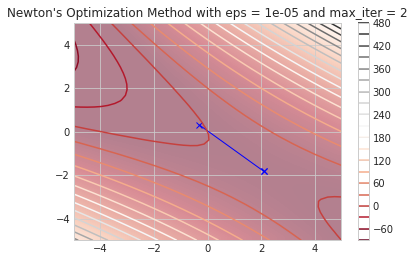

In [4]:
x0 = np.array([-0.3, 0.3])
N = Newton_Optimizer(x0=x0, eps=1e-5, max_iter=2)
N.Plot_contour_and_path(size=5)

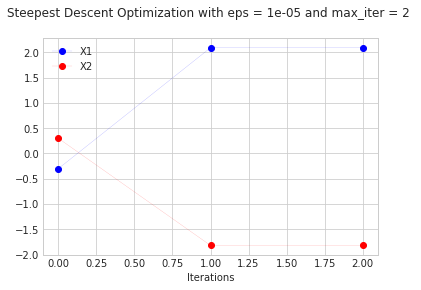

In [6]:
# plot X1 and X2 history during the iterations
plt.plot(N.x_history[:,0], 'o-', color = 'blue', linewidth = 0.1, label = 'X1')
plt.xlabel('Iterations')
plt.plot(N.x_history[:,1], 'o-', color = 'red', linewidth = 0.1, label = 'X2')
plt.legend()
plt.title(f'Steepest Descent Optimization with eps = {N.eps} and max_iter = {N.max_iter} \n')
plt.show()

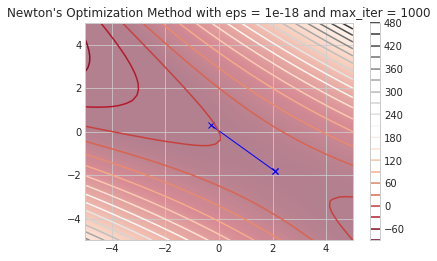

In [7]:
x0 = np.array([-0.3, 0.3])
N = Newton_Optimizer(x0=x0, eps=1e-18, max_iter=1000)
N.Plot_contour_and_path(size=5)

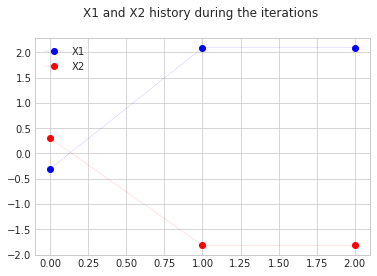

In [108]:
# plot X1 and X2 history during the iterations
x = N.x_history[:,0].reshape(N.x_history.shape[0],1)
plt.plot(x, 'o-', color = 'blue', linewidth = 0.1, label = 'X1')
x = N.x_history[:,1].reshape(N.x_history.shape[0],1)
plt.plot(x, 'o-', color = 'red', linewidth = 0.1, label = 'X2')
plt.title(f'X1 and X2 history during the iterations \n')
plt.legend()
plt.show()

## Thereupon:
By setting up the accuracy (epsilon) to be $eps=10^{-5}$ and the maximum number of iterations to be $2$, we can get the following result:
As we can see, the steepest descent method converges to the minimum of the function in the third iteration, and Newton's method converges to the minimum of the function in the second iteration.

Additionally, we decrease the accuracy(epsilon) to $10^{-18}$ and increase the maximum number of iterations to $10^{3}$ in the steepest descent method and $10^{3}$ in Newton's method, respectively, we can get the following result:
As we can see, the steepest descent method converges to the minimum of the function more than ten times, and Newton's method converges to the minimum of the function in the second iteration.

So, according to the above results, we can conclude that the newton's method is more accurate and faster than the steepest descent method.
The steepest descent method is not suitable for solving the nonlinear equations, and newton's method is ideal for solving the nonlinear equations.